## UseCase Intro: Employee Attrition


Employee Attriton has always been a major problem for companies.
- The cost of replacing an employee has always been significant due to the fact that most times:
- The company will have to pay the new employee more than the employee they are replacing
- Lots of time and resources invested in interviewing multiple candidates


### EDA

Let's perform some basic EDA on the data to gain some insights

#### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

#### Loading data

In [ ]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 99.6MB/s]


#### Reading data

In [ ]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### What can we see from this info ?
- The dataset has around 1500 samples
- It contains information about :

    1. Employee profile\ Eg: Age, Gender, Marital Status

    2. Employee work-life\ Eg: Working hours, job satisfaction etc

#### How can we use this information for our problem ?
- To understand lets analyze the features



#### How can we do that ?
Plotting their histograms

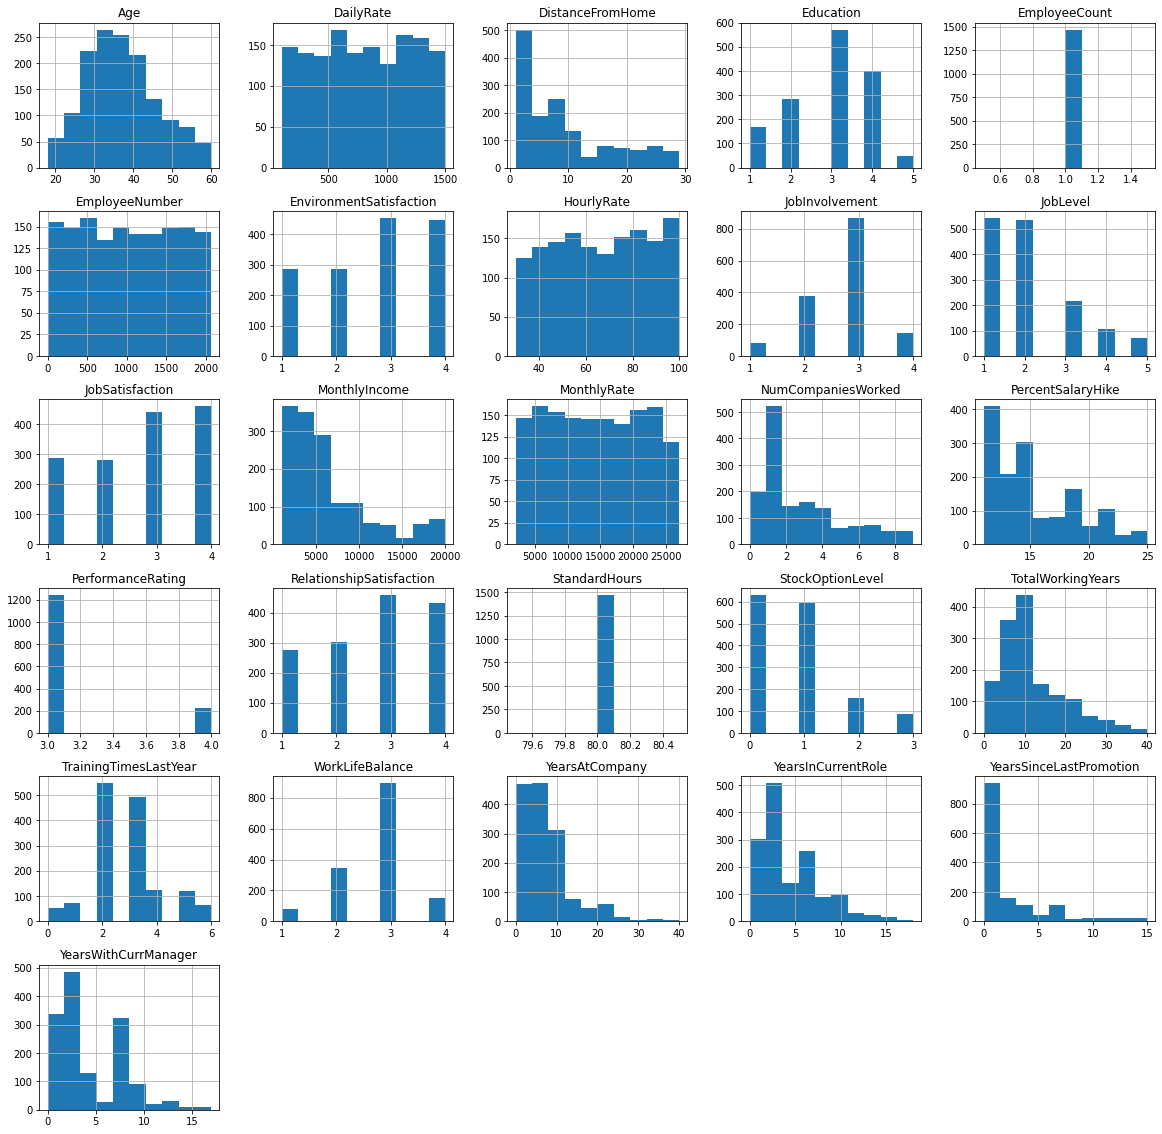

In [ ]:
df.hist(figsize = (20,20))
plt.show()

#### What can we observe from these plots ?

1. Many histograms are tail-heavy; 

  - Lot of attributes are right-skewed\
 (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany)

  - Data transformation methods may be required to approach a normal distribution prior to fitting the model based on which model we choose 

2. Some features seem to have normal distributions
  
  - Eg: Age: Slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old

3. Some features are constant

  - Eg: EmployeeCount and StandardHours are constant values for all employees. 
  
  - They're likely to be redundant features.

4. Some features seem to be uniformly distributed.

  - Eg: EmployeeNumber

5. **Uniformly distributed and constant features won't contribute** to our analysis

6. Some features are categorical i.e **binomially/multinomially distributed**

  - Eg: WorkLifeBalance, StockOptionLevel etc

7. We can also see from these features that their ranges vary a lot

  - Recall why different feature scales can be a problem

  - We will deal with this problem later

First, lets remove the features that won't contribute to our analysis


In [ ]:
# let's remove the redundant features from the dataset
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

#### Lets analyse the target feature now

In [ ]:
target = df['Attrition'].copy()
df = df.drop(["Attrition"], axis = 1)
type(target)

pandas.core.series.Series

In [ ]:
target

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [ ]:
target = target.apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
target

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
target.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
demo = {'target':target.values}
demo = pd.DataFrame(demo)
demo.to_csv('target.csv',index=False)

#### What can we infer from this info ?
  - The dataset is extremely imbalanced
  - Recall how we deal with imbalanced data

For this dataset we will use SMOTE oversampling technique to balance the data

But SMOTE is applied only to encoded training set

So we need to split the data first

## Splitting the data

#### In what sets should we split it ?
  
  - Train/test set
  
  - #### Why not create a validation set ?
    - We already have less amount of data
    - And we want to train the model with max possible data
    - So we will use K-Fold cross validation instead
  
#### What ratios should we use for splitting ?
  - 80%/20% for train/test looks enough

So lets split the dataset now

In [ ]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 30)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 30)
Number transactions y_test dataset:  (368,)


### Encoding features


  - #### What is encoding ?
   
    - Changing features with text values to number form
   
    - Its required because ML algos can take features only in number form


#### What are the encoding techniques we can use ?

  - Binary Encoding (0/1) :
    - Used for features having only 2 unique values
  
  - Label Encoding (0, 1, 2, 3 ....) :  
    - Features with more than 2 unique values having a particular order
    - For 2 features binary = label encoding

  - OneHot Encoding ([0 0 0 1], ...) : 
    - Features with more than 2 unique values having no order
    - Used when number of unique vals is less since it requires more space

  - Target encoding ([0.1, 0.33, .....)] :
    - Features with a lot of unique vals having no order
    - Assigns mean of the target value to the feature val
    - Always done after train-test split





#### Which encoding technique should we use ?
  
  - It depends upon:
    - Number of unique values a feature has
    - If there is a sequence between the feature vals

Lets first check how many unique values each feature has


In [ ]:
for col in df.columns[1: ]:

  if X_train[col].dtype == "object":
    print(f"{col}: {df[col].nunique()}")

BusinessTravel: 3
Department: 3
EducationField: 6
Gender: 2
JobRole: 9
MaritalStatus: 3
OverTime: 2



We will use binary encoding for features with 2 or less unique vals

For features < 6 unique vals we will use OneHot encoding

Rest of the categorical features will be Target encoded




## Encoding

Lets encode these features now

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
cols = []

for col in X_train.columns[1:]:

    if X_train[col].dtype == 'object':

        if len(list(X_train[col].unique())) <= 2:
            
            X_train[col] = le.fit_transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
            le_count += 1
            cols.append(col)

print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

for col in ['BusinessTravel', 'Department','MaritalStatus']:
    if(col in X_train.columns):      
        train_encoded_vals = ohe.fit_transform(X_train[col].values.reshape(-1,1))
        categories = col+'_'+ohe.categories_[0]

        X_train[categories] = train_encoded_vals

        test_encoded_vals = ohe.transform(X_test[col].values.reshape(-1,1))
        X_test[categories] = test_encoded_vals




In [ ]:
X_train.drop(['BusinessTravel', 'Department','MaritalStatus'], axis = 1, inplace = True )
X_test.drop(['BusinessTravel', 'Department','MaritalStatus'], axis = 1, inplace = True )

In [ ]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1011,36,1174,3,4,Marketing,1,0,99,3,2,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1152,21,546,5,1,Medical,3,1,97,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
650,43,422,1,3,Life Sciences,4,0,33,3,2,...,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
824,42,188,29,3,Medical,2,1,56,1,2,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1108,35,992,1,3,Medical,4,1,68,2,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_test.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
681,38,1333,1,3,Technical Degree,4,0,80,3,3,...,11,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
946,40,299,25,4,Marketing,4,1,57,2,3,...,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
626,32,638,8,2,Medical,3,0,91,4,2,...,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1154,47,1176,26,4,Life Sciences,4,0,98,3,5,...,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
669,39,1122,6,3,Medical,4,1,70,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Now we will first perform target encoding

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.3 MB/s 


In [ ]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['EducationField', 'JobRole'])
X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
X_train.to_csv('X_train.csv',index=False)

In [ ]:
X_test.to_csv('X_test.csv',index=False)

In [ ]:
df = {'Target': y_test.values}

pd.DataFrame(df).to_csv('y_test.csv',index=False)


df = {'Target': y_train.values}

pd.DataFrame(df).to_csv('y_train.csv',index=False)